Name: A Rahul  
Reg. No.: 20BRS112

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/20BRS1102 Deep Learning Lab/Lab 12 - 23 03 2023

/content/drive/MyDrive/20BRS1102 Deep Learning Lab/Lab 12 - 23 03 2023


# Question 1 : Movie review sentimental analysis using LSTMs


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re

In [ ]:
data = pd.read_csv('./Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

In [ ]:
data.head()  

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [ ]:
data = data[data.sentiment != "Neutral"]
data['text'] = data['text'].apply(lambda x: x.lower())
# removing special chars
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
#
data.head()

<ipython-input-5-f8f03ba23afd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: x.lower())
<ipython-input-5-f8f03ba23afd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))


,text,sentiment
1,rt scottwalker didnt catch the full gopdebate ...,Positive
3,rt robgeorge that carly fiorina is trending h...,Positive
4,rt danscavino gopdebate w realdonaldtrump deli...,Positive
5,rt gregabbott_tx tedcruz on my first day i wil...,Positive
6,rt warriorwoman91 i liked her and was happy wh...,Negative


In [ ]:
print(data[ data['sentiment'] == 'Positive'].size)
print(data[ data['sentiment'] == 'Negative'].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt','')
data.head()

4472
16986


,text,sentiment
1,scottwalker didnt catch the full gopdebate la...,Positive
3,robgeorge that carly fiorina is trending hou...,Positive
4,danscavino gopdebate w realdonaldtrump delive...,Positive
5,gregabbott_tx tedcruz on my first day i will ...,Positive
6,warriorwoman91 i liked her and was happy when...,Negative


In [ ]:
    
max_fatures = 2500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)
X[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         359,  120,    1,  692,    2,   39,   58,  234,   37,  207,    6,
         172, 1745,   12, 1308, 1394,  733],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          16,  281,  249,    5,  809,  102,  170,   26,  134,    6,    1,
         171,   12,    2,  231,  713,   17]], dtype=int32)

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 128)           256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 28, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8583, 28) (8583, 2)
(2146, 28) (2146, 2)


In [ ]:
model.fit(X_train, Y_train, epochs = 15, batch_size=32, verbose = 1)

Epoch 1/15
68/68 [==============================] - 27s 291ms/step - loss: 0.4710 - accuracy: 0.7959
Epoch 2/15
68/68 [==============================] - 14s 210ms/step - loss: 0.3335 - accuracy: 0.8577
Epoch 3/15
68/68 [==============================] - 13s 196ms/step - loss: 0.2835 - accuracy: 0.8817
Epoch 4/15
68/68 [==============================] - 12s 170ms/step - loss: 0.2610 - accuracy: 0.8905
Epoch 5/15
68/68 [==============================] - 27s 398ms/step - loss: 0.2414 - accuracy: 0.9025
Epoch 6/15
68/68 [==============================] - 14s 195ms/step - loss: 0.2428 - accuracy: 0.8986
Epoch 7/15
68/68 [==============================] - 10s 142ms/step - loss: 0.2124 - accuracy: 0.9101
Epoch 8/15
68/68 [==============================] - 10s 152ms/step - loss: 0.2020 - accuracy: 0.9180
Epoch 9/15
68/68 [==============================] - 11s 160ms/step - loss: 0.1900 - accuracy: 0.9223
Epoch 10/15
68/68 [==============================] - 11s 156ms/step - loss: 0.1790 - accura

In [ ]:
predict_x=model.predict(X_test) 
Y_pred=np.argmax(predict_x,axis=1)

68/68 [==============================] - 1s 10ms/step


In [ ]:
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix [[1523  190]
 [ 196  237]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1713
           1       0.56      0.55      0.55       433

    accuracy                           0.82      2146
   macro avg       0.72      0.72      0.72      2146
weighted avg       0.82      0.82      0.82      2146



# Question 2 : Stock market prediction using LSTMs

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [ ]:
#Importing the data
train= pd.read_csv('./Price_Train.csv')
test= pd.read_csv('./Price_Test.csv')

In [ ]:
#taking open price from data in 2d array , if we will do train.loc[:, 'open'].values it gives one d array which wont
#be considered in scaling
train_open= train.iloc[:, 1:2].values


In [ ]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [ ]:
train_open_scaled[60]

array([0.08627874])

In [ ]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [ ]:
#Reshaping the train data to make it as input for LTSM layer input_shape(batchzise,timesteps,input_dim)
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [ ]:
xtrain.shape

(1198, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
#initialisizng the model 
regression = Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
40/40 [==============================] - 10s 21ms/step - loss: 0.0333
Epoch 2/100
40/40 [==============================] - 1s 22ms/step - loss: 0.0062
Epoch 3/100
40/40 [==============================] - 1s 22ms/step - loss: 0.0070
Epoch 4/100
40/40 [==============================] - 1s 14ms/step - loss: 0.0057
Epoch 5/100
40/40 [==============================] - 1s 23ms/step - loss: 0.0056
Epoch 6/100
40/40 [==============================] - 1s 21ms/step - loss: 0.0050
Epoch 7/100
40/40 [==============================] - 1s 14ms/step - loss: 0.0049
Epoch 8/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0049
Epoch 9/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0051
Epoch 10/100
40/40 [==============================] - 1s 16ms/step - loss: 0.0040
Epoch 11/100
40/40 [==============================] - 1s 16ms/step - loss: 0.0039
Epoch 12/100
40/40 [==============================] - 1s 16ms/step - loss: 0.0041
Epoch 13/100
40/40 [====

In [ ]:
test_open= test.iloc[:, 1:2].values #taking  open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [ ]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction

In [ ]:
xtest= np.array(xtest)
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value)

1/1 [==============================] - 1s 1s/step


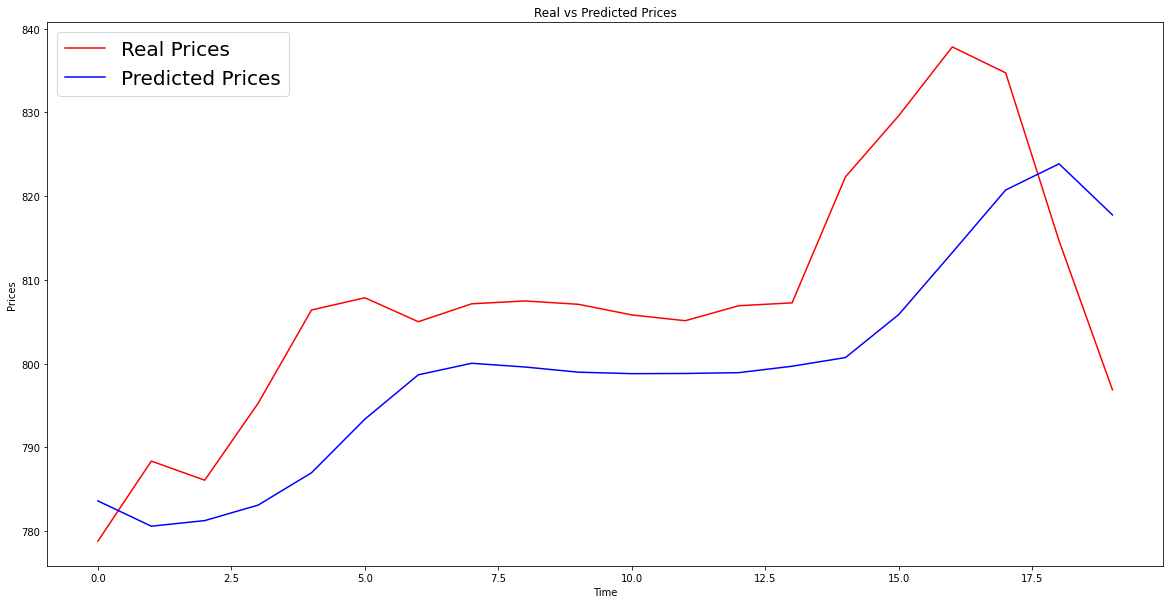

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)
